In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import yfinance as yf


In [5]:
df = yf.download('GLD','2008-01-01','2017-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,82.739998,82.830002,81.980003,82.459999,82.459999,3815600
2008-01-02,83.559998,85.139999,83.440002,84.860001,84.860001,12291100
2008-01-03,84.870003,85.940002,84.599998,85.570000,85.570000,9553900
2008-01-04,85.339996,85.550003,84.430000,85.129997,85.129997,8402200
2008-01-07,85.239998,85.260002,84.570000,84.769997,84.769997,6944300


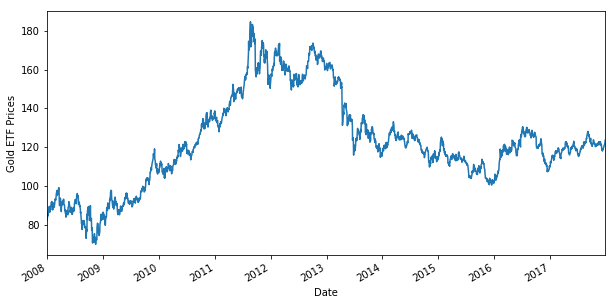

In [8]:
df = df[['Close']] #only keeping close columns
df = df.dropna() #Drop rows with missing values
df.Close.plot(figsize=(10,5)) # Plot the closing price of GLD
plt.ylabel('Gold ETF Prices')
plt.show()

In [9]:
#defining explanatory variable and they are moving avg for past 3 days and 9  days
df['S_3'] = df['Close'].shift(1).rolling(window=3).mean()
df['S_9'] = df['Close'].shift(1).rolling(window=9).mean()
df = df.dropna()
X = df[['S_3','S_9']]
X.head()

,S_3,S_9
Date,,
2008-01-14,87.793335,85.883333
2008-01-15,88.790001,86.670000
2008-01-16,88.703334,87.017777
2008-01-17,88.076665,87.143333
2008-01-18,87.063332,87.295555


In [11]:
#defining dependent variable
y = df['Close']
y.head()

Date
2008-01-14    89.540001
2008-01-15    87.989998
2008-01-16    86.699997
2008-01-17    86.500000
2008-01-18    87.419998
Name: Close, dtype: float64

In [21]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred=reg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
Date,,
2010-04-16,111.239998,113.289237
2013-09-06,134.149994,134.174856
2012-06-21,152.020004,156.903829
2017-02-08,118.190002,117.487167
2009-08-13,93.720001,92.857082
2015-07-15,110.160004,111.067826
2013-03-14,153.679993,153.588601
2017-06-08,121.650002,122.697679
2017-08-16,121.870003,122.093763


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9951234943513206